# Boston Housing Data 분석

- **CRIM**: Per capita crime rate by town.
- **ZN**: Proportion of residential land zoned for lots over 25,000 square feet.
- **INDUS**: Proportion of non-retail business acres per town.
- **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- **NOX**: Nitric oxide concentration (parts per 10 million).
- **RM**: Average number of rooms per dwelling.
- **AGE**: Proportion of owner-occupied units built prior to 1940.
- **DIS**: Weighted distances to five Boston employment centers.
- **RAD**: Index of accessibility to radial highways.
- **TAX**: Full-value property tax rate per $10,000.
- **PTRATIO**: Pupil-teacher ratio by town.
- **B**: 1000(Bk - 0.63)^2 where Bk is the proportion of Black residents by town.
- **LSTAT**: Percentage of lower status of the population.

Target Variable:
- **MEDV**: Median value of owner-occupied homes in $1000s.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/Users/choejuhui/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# housing.xls가 포함된 경로를 저장해봅시다.
PATH = '/Users/choejuhui/Desktop/KUBIG/ML study(여름방학)/'

In [5]:
# 본인 구글 드라이브에 업로드한 housing.xls 파일의 주소를 넣어주세요!
house = pd.read_excel(PATH+'housing.xls')

# Q1: `head`, `info`, `describe`, `shape` 함수를 실행해봅시다.

과제2 참고

In [ ]:
# .head()

# .info()

# .describe()

# .shape

In [6]:
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [10]:
house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
house.shape

(506, 14)

# Q2: 각 변수의 결측치 (NaN 또는 Null)의 개수를 구해봅시다.

과제2 참고

In [12]:
# NaN의 개수 구하기
house.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# Q3: 각 변수별로 히스토그램을 그리고, Scatterplot Matrix를 그려봅시다

과제2 참고

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

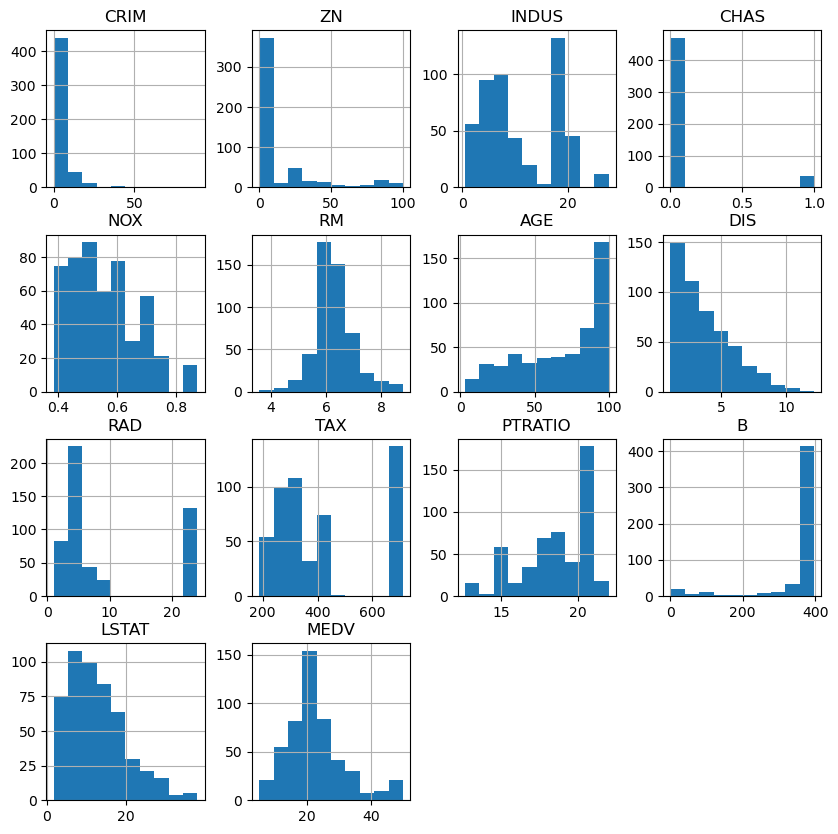

In [15]:
# Histogram
house.hist(figsize=(10,10))

<Axes: >

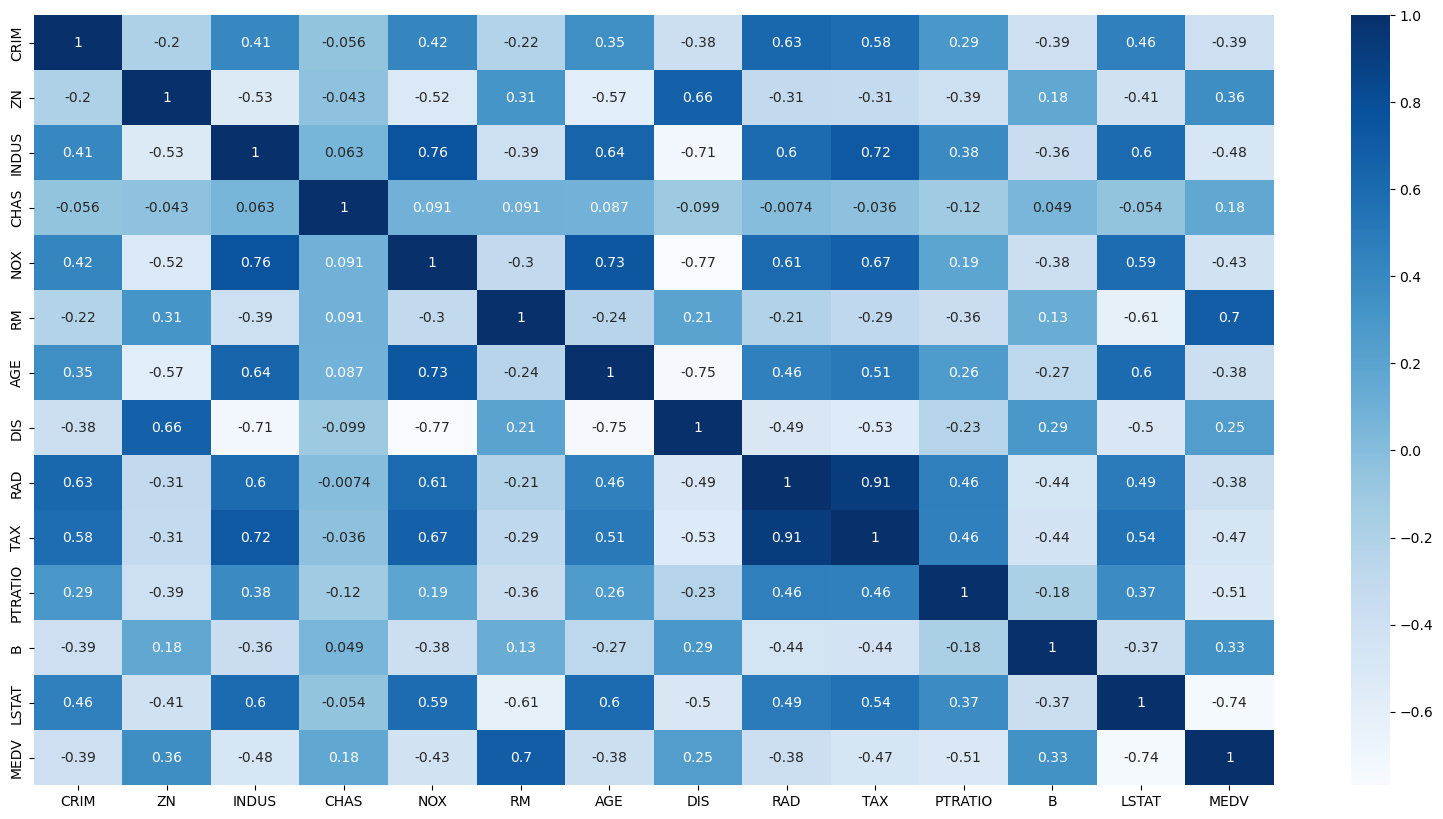

In [14]:
# Scatterplot Matrix
plt.figure(figsize = (20, 10))
corr = house.corr()
sns.heatmap(corr, annot = True, cmap = "Blues")

# Q4: 데이터를 `X_train`, `X_test`, `y_train`, `y_test` 로 split해 봅시다

split 비율은 자유롭게 정해보시기 바랍니다.

In [17]:
# train_test_split
X = house.drop('MEDV', axis=1)
y = house['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [18]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,2.52,23.29
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


In [19]:
y_train

477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: MEDV, Length: 404, dtype: float64

# Q5: `StandardScaler`로 표준화를 해봅시다

CRIM, ZN, INDUS, NOX, RM, AGE, DIS, TAX, PTRATIO, B, LSTAT 변수들만 `StandardScaler`을 해봅시다.

`X_train`은 `fit_transform`, `X_test`는 `transform`을 이용하는 것에 유의합시다!

In [20]:
# StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Q6: 5-fold Cross-Validation으로 `LinearRegression`을 적합해봅시다.

각 fold마다 적합 후 MSE, MAE, RMSE, $R^2$를 구하고, coefficient과 intercept를 `print` 해보세요.

In [21]:
# KFold, cross_val_score, cross_validation 이용
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)

lr2 = LinearRegression()

fold = 0
for train_index, test_index in kfold.split(X): # split 안한 데이터 사용
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  # Scaling 필요하면 이 단계에 넣기
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  lr2.fit(X_train_scaled, y_train)
  pred = lr2.predict(X_test_scaled)

  
  mse = metrics.mean_squared_error(y_test, pred)
  mae = metrics.mean_absolute_error(y_test, pred)
  rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
  r_2 = metrics.r2_score(y_test, pred)

  fold += 1
  print("Fold {}: MSE = {}, MAE = {}, RMSE = {}, R^2 = {}, Coefficients = {}, Intercept = {}".format(fold, mse, mae, rmse, r_2, lr2.coef_, lr2.intercept_), '\n') # \n으로 줄 바꾸기

Fold 1: MSE = 24.2911194749735, MAE = 3.1890919658878443, RMSE = 4.928602182665334, R^2 = 0.6687594935356322, Coefficients = [-1.00213533  0.69626862  0.27806485  0.7187384  -2.0223194   3.14523956
 -0.17604788 -3.0819076   2.25140666 -1.76701378 -2.03775151  1.12956831
 -3.61165842], Intercept = 22.796534653465343 

Fold 2: MSE = 20.867900937377694, MAE = 3.4398313636217432, RMSE = 4.568139767714829, R^2 = 0.7342547033954026, Coefficients = [-0.77678337  1.32783013  0.11595354  0.81155918 -1.79718649  2.32762033
 -0.18665257 -3.17205335  2.61962819 -2.00239762 -2.04997347  0.68238881
 -4.07455091], Intercept = 22.712098765432103 

Fold 3: MSE = 26.39596868928082, MAE = 3.4576380412650902, RMSE = 5.1377007200965705, R^2 = 0.7098660061066442, Coefficients = [-0.75253173  0.82667295  0.04360588  0.69029491 -2.24391084  2.94404514
 -0.09408048 -3.03267132  2.5127737  -1.88336403 -2.14048272  0.93184053
 -3.24863881], Intercept = 22.322962962962965 

Fold 4: MSE = 23.40122507616271, MAE = 

# Q7: `GridSearchCV`를 이용하여 `Lasso`를 적합해봅시다.

찾아야 하는 최적 파라미터는

- `alpha`: 0.01, 0.1, 1, 10 중에서 찾기
- `fit_intercept`: `True`, `False`에서 찾기

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

위 링크를 참조하여 `GridSearCV`의 `scoring`을 3가지 이상 사용해보세요

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# param_grid
params = {'alpha' : [0.01, 0.1, 1, 10],
          'fit_intercept': [True, False]}

lasso = Lasso()
grid_search = GridSearchCV(estimator=lasso, param_grid=params, 
                           cv=10, scoring=['neg_mean_squared_error','neg_mean_absolute_error', 'r2'], 
                           refit = 'neg_mean_squared_error')

grid_search.fit(X_train_scaled, y_train)

# 최적 파라미터와 최적 MSE
print("최적 파라미터: ", grid_search.best_params_)
print("최적 Train MSE: ", -grid_search.best_score_)

# 최적 파라미터 저장 모델을 저장. refit = True 사용하는 이유
best_lasso = grid_search.best_estimator_
print('GridSearchCV 최적 파라미터: ', best_lasso)

# best_lasso를 이용해 test set 예측
y_pred = best_lasso.predict(X_test_scaled)
mse = metrics.mean_squared_error(y_test, y_pred)
print("최적 모델 Test MSE: ", mse)

최적 파라미터:  {'alpha': 0.01, 'fit_intercept': True}
최적 Train MSE:  33.52345090268331
GridSearchCV 최적 파라미터:  Lasso(alpha=0.01)
최적 모델 Test MSE:  22.383472513261147


# Q8(Optional): BONUS! `RandomizedSearchCV`를 이용하여 `Ridge`를 적합해 봅시다.

CV를 이용한 hyperparameter tuning의 또다른 방법은 `RandomizedSearchCV`입니다.
Tuning해야 하는 모수가 많을 경우 이 방법이 빠르다는 장점이 있습니다.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#

위 링크를 참조하거나 구글링을 하여 `Ridge`를 적합해보세요.

`n_iter`와, 파라미터 공간을 자유롭게 조정해보세요.

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge

ridge = Ridge()
params = {'alpha':[0.01, 0.1, 1, 10, 100],
          'fit_intercept': [True, False]}

random_cv = RandomizedSearchCV(estimator=ridge, param_distributions=params, 
                               n_iter=10, scoring='neg_mean_squared_error')

random_cv.fit(X_train_scaled, y_train)

print("최적 파라미터: ", random_cv.best_params_)
print("최적 Train MSE: ", -random_cv.best_score_)

best_ridge = random_cv.best_estimator_
print('RandomSearchCV 최적 파라미터: ', best_ridge)

y_pred = best_ridge.predict(X_test_scaled)
mse = metrics.mean_squared_error(y_test, y_pred)
print("최적 모델 Test MSE: ", mse)

최적 파라미터:  {'fit_intercept': True, 'alpha': 100}
최적 Train MSE:  34.1704984971164
RandomSearchCV 최적 파라미터:  Ridge(alpha=100)
최적 모델 Test MSE:  23.178831548625393


In [27]:
# scale 안한 데이터로 돌리기
ridge = Ridge()
params = {'alpha':[0.01, 0.1, 1, 10, 100],
          'fit_intercept': [True, False]}

random_cv = RandomizedSearchCV(estimator=ridge, param_distributions=params, 
                               n_iter=10, scoring='neg_mean_squared_error')

random_cv.fit(X_train, y_train)

print("최적 파라미터: ", random_cv.best_params_)
print("최적 Train MSE: ", -random_cv.best_score_)

best_ridge = random_cv.best_estimator_
print('RandomSearchCV 최적 파라미터: ', best_ridge)

y_pred = best_ridge.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
print("최적 모델 Test MSE: ", mse)

최적 파라미터:  {'fit_intercept': True, 'alpha': 100}
최적 Train MSE:  30.76005495277506
RandomSearchCV 최적 파라미터:  Ridge(alpha=100)
최적 모델 Test MSE:  25.58746516139349
